In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
unif_size = 2048

In [3]:
unifs = np.random.uniform(0, 1, size=(10000, unif_size)) / np.sqrt(unif_size)
unifs = np.linalg.norm(unifs, axis=1)

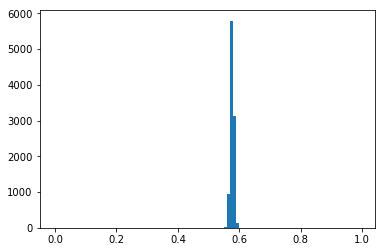

In [4]:
bins = np.arange(0, 1, .01)
plt.hist(unifs, bins=bins)
plt.show()

In [5]:
unifs.mean()

0.57742067908941297

In [6]:
nb = 100000

normals = np.random.randn(nb)
normals = np.append(normals.reshape(-1,1), np.zeros((nb,1)), axis=1)
normals = np.max(normals, axis=1)

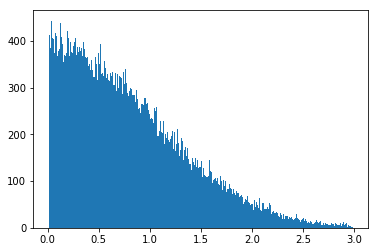

In [7]:
bins = np.arange(0.01, 3, .01)
plt.hist(normals, bins=bins)
plt.show()

In [8]:
normals.mean(), normals.var()

(0.3985453895616804, 0.33947811809584166)

In [9]:
normals2 = normals / normals.std()

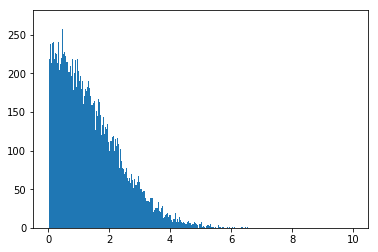

In [10]:
bins = np.arange(0.01, 10, .01)
plt.hist(normals2, bins=bins)
plt.show()

In [11]:
normals2.mean(), normals2.var()

(0.68402487674428369, 0.99999999999999956)

In [12]:
np.sqrt(2. / np.pi) / 2

0.3989422804014327

Scalar product : Distances

In [13]:
hidden_layer_size = 256
nb = 50000
m = 1. / np.sqrt(256)

normals = np.random.randn(256, 50000)
W = np.random.uniform(-m, m, 256).reshape(1, -1)
W /= np.linalg.norm(W) * 0.587
w_0 = np.random.uniform(-m,m)

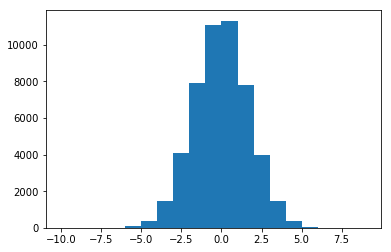

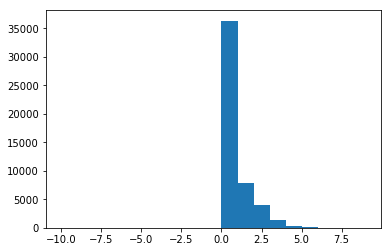

In [14]:
bins=np.arange(-10, 10, 1.)

scalar = np.dot(W, normals)
scalar += w_0

relu = np.append(scalar, np.zeros((1, nb)), axis=0)
relu = np.max(relu, axis=0)

scalar = scalar.reshape(-1)

plt.hist(scalar, bins=bins)
plt.show()

plt.hist(relu, bins=bins)
plt.show()

In [15]:
scalar.mean(), scalar.std(), relu.mean(), relu.std()

(-0.01208949343002323,
 1.6944170667214304,
 0.66829653649775878,
 0.98320248371740859)

In [16]:
relu[relu > 0].mean(), relu[relu > 0].std()

(1.3378238709567976, 1.0195317257946255)

In [17]:
np.sqrt(2 / np.pi)

0.79788456080286541

# Is L1 locally euclidiean - Tests

In [34]:
n = 256
m = 1. / np.sqrt(n)
e12 = 300
nb = 10000

X_1 = np.random.randn(256)
W_i = np.random.uniform(-m, m, size=(nb * e12,n))
w_0 = np.random.uniform(-m,m, nb * e12)

E_12 = np.dot(W_i, X_1) + w_0
E_12 = np.abs(E_12)

E_12 = E_12.reshape(nb, e12)
E_12 = np.power(E_12, 2).sum(1)

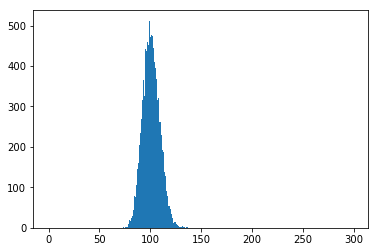

(100.80183540811375, 8.2472644905538228)

In [35]:
plt.hist(E_12, bins=np.arange(0, e12, 1.))
plt.show()
E_12.mean(), E_12.std()

In [37]:
11. / 500, 3.8 / 100, 6.9 / 200, 8.24 / 300

(0.022, 0.038, 0.0345, 0.027466666666666667)

# Distribution of d(H, 0) :

In [36]:
n = 256
m = 1. / np.sqrt(n)
nb = 100000

In [37]:
Ws = np.random.uniform(-m, m, size=(nb, n))
bs = np.random.uniform(-m,m, size=(nb))

Ws = np.linalg.norm(Ws, axis=1)

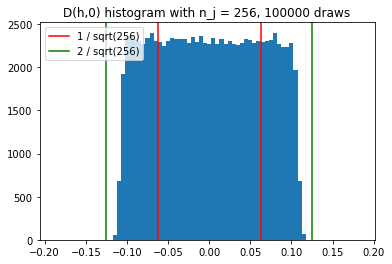

In [38]:
bins = np.arange(- 3 * m, 3 * m, 0.005)
plt.hist(bs / Ws, bins=bins)
plt.axvline(m, color='red', label='1 / sqrt(%d)' % (n))
plt.axvline(-m, color='red')
plt.axvline(m * 2, color='green', label='2 / sqrt(%d)' % (n))
plt.axvline(-m * 2, color='green')
plt.legend()
plt.title('D(h,0) histogram with n_j = %d, %d draws' % (n, nb))

In [29]:
m / 0.5

0.0625

# Distribution of an activtion in first layer

In [3]:
n = 256
m = 1. / np.sqrt(n)
nb = 100000

In [14]:
W = np.random.uniform(-m, m, n)
b = np.random.uniform(-m, m)
X = np.random.normal(0, 1, size=(nb, n))

WX_b = X.dot(W) + b
print(WX_b.reshape(-1, 1).shape, np.zeros((nb, 1)).shape)
A = np.max(np.append(WX_b.reshape(-1, 1), np.zeros((nb, 1)), axis=1), axis=1)

((100000, 1), (100000, 1))


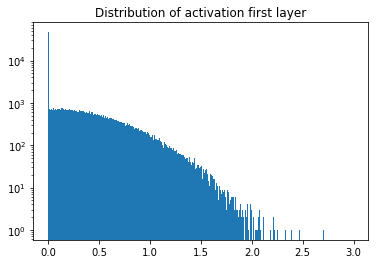

(0.25277630113341637, 0.34674191146713973)

In [23]:
plt.hist(A, bins=np.arange(0, 3., 0.01), log=True)
plt.title('Distribution of activation first layer')
plt.show()
A.mean(), A.std()

(0.002298777804042603, 0.58422263128611829, (53945,))

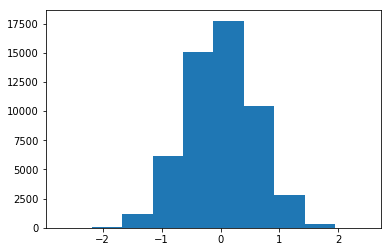

In [44]:
pos = A[A > 0]
bernouilli = np.random.randint(2, size=pos.shape[0])
bernouilli[bernouilli < 0.5] = -1
renormal = pos * bernouilli

plt.hist(renormal)
renormal.mean(), renormal.std(), renormal.shape

In [48]:
mu_Y = A[A>0].mean()
sigma_Y = A[A>0].std()

In [49]:
mu_Y * np.sqrt(np.pi / 2.), np.sqrt(mu_Y ** 2 + sigma_Y ** 2)

(0.58727984389439392, 0.58422715384195223)

# Visualizing 2-d B|Y| distribution

In [59]:
nb = 10000

bernouillis = np.random.randint(2, size=(nb * 2))
abs_normal = np.abs(np.random.normal(0, 1, size=(nb * 2)))
A = bernouillis * abs_normal
A = A.reshape(nb, 2)

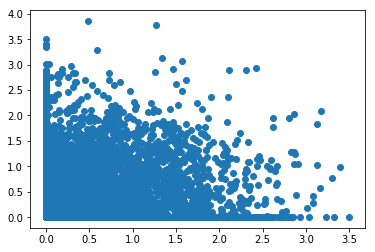

In [62]:
plt.scatter(A[:,0], A[:,1])

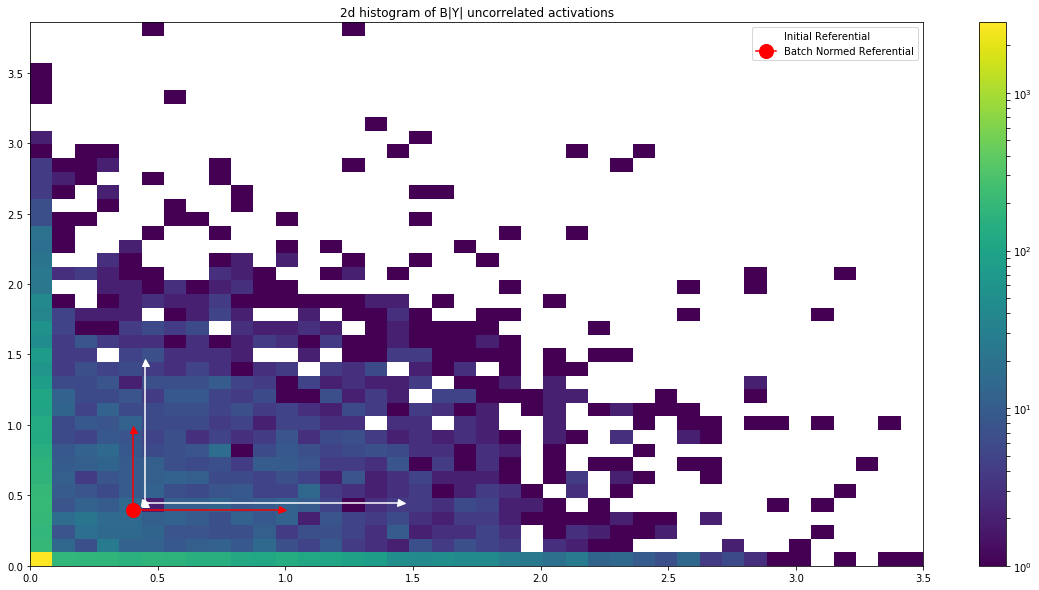

In [107]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(20,10))
plt.hist2d(A[:,0], A[:,1], bins=40, norm=LogNorm())
plt.colorbar()
plt.plot([A[:,0].mean(), A[:,0].mean() + A[:,0].std()], [A[:,1].mean(), A[:,1].mean()], marker='>', markersize=7, color="red")
plt.plot([A[:,0].mean()+0.05, A[:,0].mean() + 1.05], [A[:,1].mean()+0.05, A[:,1].mean()+0.05], marker='>', markersize=7, color="white", label='Initial Referential')

plt.plot([A[:,0].mean(), A[:,0].mean()], [A[:,1].mean(), A[:,1].mean() + A[:,1].std()], marker='^', markersize=7, color="red")
plt.plot([A[:,0].mean()+0.05, A[:,0].mean()+0.05], [A[:,1].mean()+0.05, A[:,1].mean() + 1.05], marker='^', markersize=7, color="white")
plt.title('2d histogram of B|Y| uncorrelated activations')
plt.plot([A[:,0].mean()], [A[:,1].mean()], marker='o', markersize=14, color="red", label='Batch Normed Referential')
plt.legend()
plt.show()

# Distribution of ||WX||_2^2

(0.3335438567539854, 0.046845179378803885, (1000,))


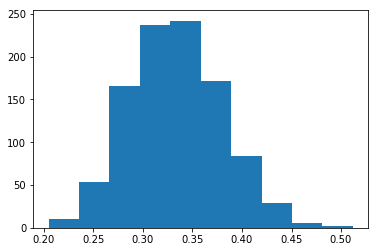

In [32]:
nb = 100
n_0 = 3 * 32 * 32
m = 1. / np.sqrt(n_0)
draw = 1000


X = np.random.normal(0, 1 , size=(nb * draw, n_0))
W = np.random.uniform(-m, m, size=(n_0))

variances = np.power(X.dot(W).reshape(draw, nb), 2).sum(1) / nb
print(variances.mean(), variances.std(), variances.shape)
plt.hist(variances)
plt.show()

# Probability of the 0-1 approximation being ok ?

In [30]:
nb_a = 100000
n_j = 256
m = 1. / np.sqrt(n_j)
nb_b = 1000

f_j = np.random.randint(2, size=(nb_a, n_j)) * np.abs(np.random.normal(0, 1, size=(nb_a, n_j)))
a_j = np.where(f_j > 0, 1, 0)

w, b = np.random.uniform(-m, m, size=(nb_b, n_j)), np.random.uniform(-m, m, size=(1,nb_b)).repeat(nb_a, 0)

side_f_j = np.where(f_j.dot(w.transpose()) + b >= 0, 1, -1).reshape(-1)
side_a_j = np.where(a_j.dot(w.transpose()) + b >= 0, 1, -1).reshape(-1)

np.where(side_a_j * side_f_j == 1, 1, 0).mean()

0.79468059999999996

# Matrix rank number of linear regions

In [1]:
from scipy.special import comb

In [32]:
rank = 3
num_layer = 4
comb(num_layer, rank)

4.0

In [35]:
def num_comp_linear(num_layer, rank):
    if rank == 1:
        return num_layer + 1
    
    if rank == num_layer:
        return 2 ** num_layer
    
    return num_comp_linear(num_layer - 1, rank) + num_comp_linear(num_layer - 1, rank - 1)

In [46]:
num_comp_linear(128, 64)

KeyboardInterrupt: 